In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - 1 (Diamond dataset)/Dataset/diamonds.csv')

In [ ]:
## Find price of diamond using its features.

## target - Price -> Price of diamond in US dollars.
## features - carat, cut, color, clarity, depth, table, x, y, z

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


##  Exploratory Data Analysis


In [ ]:
data.isna().sum()
## There are no null values in the dataset

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
data.shape

(53940, 10)

In [ ]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
data.describe()
# Observations
# Carat and price are right-skewed
# Depth, table, x, y, and z are approximately symmetrical

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data.select_dtypes(include=['object']).nunique()

,0
cut,5
color,7
clarity,8


In [ ]:
data.cut.unique()
# The quality of the diamond cut (e.g., Fair, Good, Very Good, Premium, Ideal).

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
data.color.unique()
# The color grade of the diamond, with letters indicating the quality (e.g., D (best), E, F, ..., J (worst)).


array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
data.clarity.unique()
# The clarity grade of the diamond (e.g., I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best)).

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
data.describe(include=['O'])
# Observations
# 21,551 diamonds have the "Ideal" cut.
# 11,292 diamonds have the "G" color.
# 13,065 diamonds have the "SI1" clarity.
# "Ideal" is the most popular cut, "G" is the most common color, and "SI1" is the most frequent clarity.

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


## Univariate Analysis


In [ ]:
def cont_vis_analysis(data,col):
  ## visualisation of continuous numerical variable
  fig,axes=plt.subplots(1,3,figsize=(8,3),layout='constrained')
  fig.suptitle('Continuous Data Distributions')

  axes[0].set_title('Histogram')
  sns.histplot(data[col],ax=axes[0])

  axes[1].set_title('KDE plot')
  sns.kdeplot(data[col],ax=axes[1])

  axes[2].set_title('Boxplot')
  sns.boxplot(data[col],ax=axes[2])

  fig.show()

def cont_non_vis_analysis(data,col):
  ## Non visual analaysis of continuous numerical data
  series=data[col]
  print(series.agg(['count','min','max','mean','median','var','std','skew','kurt']).round(2))
  print()

Non Visual Analysis
count     53940.00
min           0.20
max           5.01
mean          0.80
median        0.70
var           0.22
std           0.47
skew          1.12
kurt          1.26
Name: carat, dtype: float64

Visual Analysis


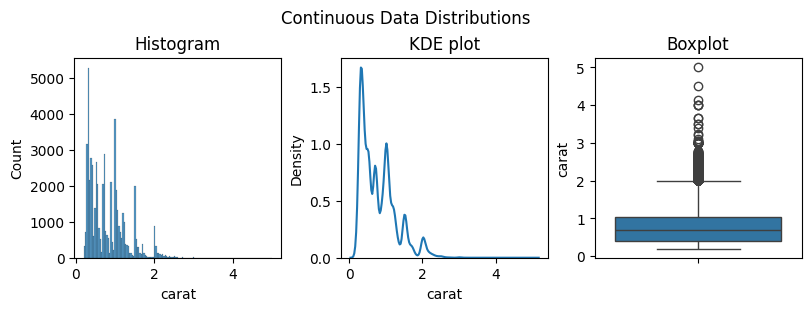

In [ ]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'carat')
print("Visual Analysis")
cont_vis_analysis(data,'carat')

In [ ]:
## Observations in "carat"
# 1. Carat distribution is highly right skewed and highly leptokurtic
# 2. There are many outliers in carat data - solutions ? log transform,standardisation

Non Visual Analysis
count     53940.00
min          43.00
max          79.00
mean         61.75
median       61.80
var           2.05
std           1.43
skew         -0.08
kurt          5.74
Name: depth, dtype: float64

Visual Analysis


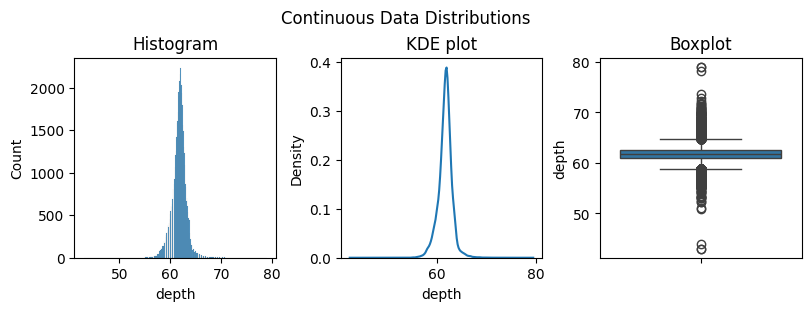

In [ ]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'depth')
print("Visual Analysis")
cont_vis_analysis(data,'depth')

In [ ]:
## Observations in "depth"
# 1. Depth distribution is normal and highly leptokurtic
# 2. There are many outliers in depth data

Non Visual Analysis
count     53940.00
min          43.00
max          95.00
mean         57.46
median       57.00
var           4.99
std           2.23
skew          0.80
kurt          2.80
Name: table, dtype: float64

Visual Analysis


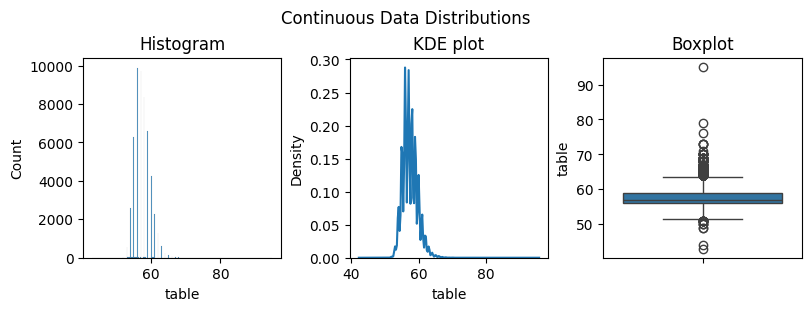

In [ ]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'table')
print("Visual Analysis")
cont_vis_analysis(data,'table')

In [ ]:
## Observations in "table"
# 1. Table distribution is normal and highly leptokurtic
# 2. There are many outliers in table data

Non Visual Analysis
count        53940.00
min            326.00
max          18823.00
mean          3932.80
median        2401.00
var       15915629.42
std           3989.44
skew             1.62
kurt             2.18
Name: price, dtype: float64

Visual Analysis


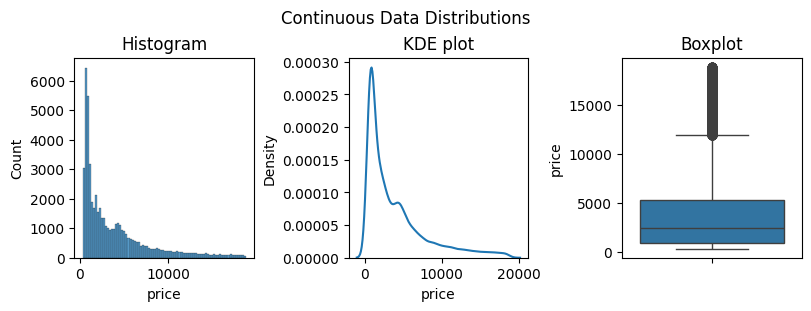

In [ ]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'price')
print("Visual Analysis")
cont_vis_analysis(data,'price')

In [ ]:
## Observations in "price"
# 1. Price distribution is right-skewed and leptokurtic
# 2. There are many outliers in price data - solution -> log transform,standardisation

Non Visual Analysis
count     53940.00
min           0.00
max          10.74
mean          5.73
median        5.70
var           1.26
std           1.12
skew          0.38
kurt         -0.62
Name: x, dtype: float64

Visual Analysis


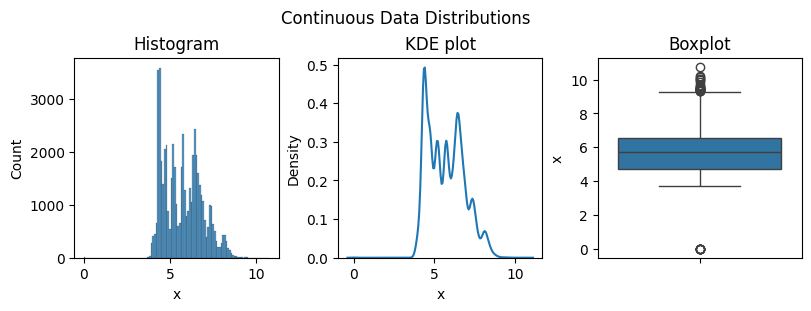

In [ ]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'x')
print("Visual Analysis")
cont_vis_analysis(data,'x')

In [ ]:
## Observations in "x (Length of the diamond in mm)"
# 1. X distribution is slightly right-skewed and platykurtic
# 2. There are outliers in 'x' data - solution -> log transform,standardisation

Non Visual Analysis
count     53940.00
min           0.00
max          58.90
mean          5.73
median        5.71
var           1.30
std           1.14
skew          2.43
kurt         91.21
Name: y, dtype: float64

Visual Analysis


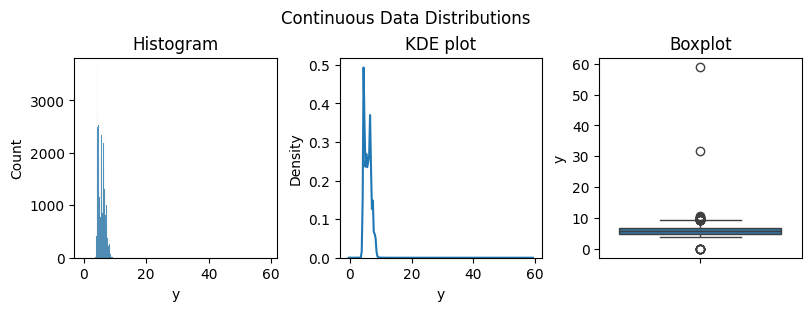

In [ ]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'y')
print("Visual Analysis")
cont_vis_analysis(data,'y')

In [ ]:
## Observations in "Y (Width of the diamond in mm.)"
# 1. Y distribution is nearly normal and leptokurtic
# 2. There are outliers in 'y' data

Non Visual Analysis
count     53940.00
min           0.00
max          31.80
mean          3.54
median        3.53
var           0.50
std           0.71
skew          1.52
kurt         47.09
Name: z, dtype: float64

Visual Analysis


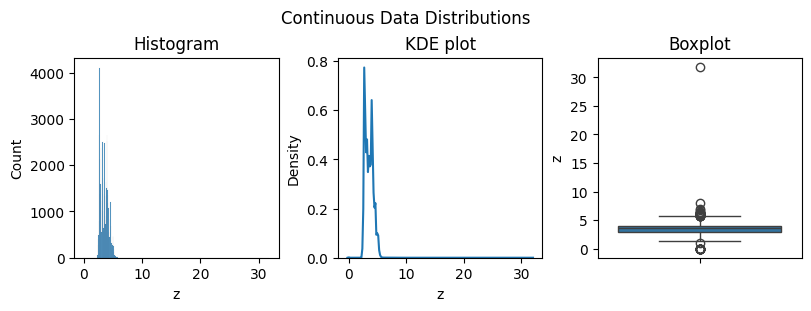

In [ ]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'z')
print("Visual Analysis")
cont_vis_analysis(data,'z')

In [ ]:
## Observations in "Z (Depth of the diamond in mm.)"
# 1. Z distribution is nearly normal and leptokurtic
# 2. There are outliers in 'z' data

## Kurtosis:

- Zero excess kurtosis (≈ 0): The distribution is mesokurtic, meaning its tails and peak are similar to those of a normal distribution.

- Positive excess kurtosis (> 0): Indicates a leptokurtic distribution, with a sharper peak and heavier tails.

- Negative excess kurtosis (< 0): Indicates a platykurtic distribution, with a flatter peak and lighter tails.

In [ ]:
def catg_disc_analysis(data,col):
  print("Value Counts for ",col)
  print(data[col].value_counts())
  print("Null values =",data[col].isna().sum())
  fig,axes=plt.subplots(1,2,figsize=(8,3),layout='constrained')
  fig.suptitle('Categorical / Discrete Num Data Distributions')

  axes[0].set_title('Bar Plot')
  sns.countplot(x=col,data=data,ax=axes[0])

  axes[1].set_title('Pie Chart')
  vc_data=data[col].value_counts()
  axes[1].pie(vc_data,labels=vc_data.index,autopct='%1.1f%%')
  fig.show()

In [ ]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

Value Counts for  cut
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
Null values = 0


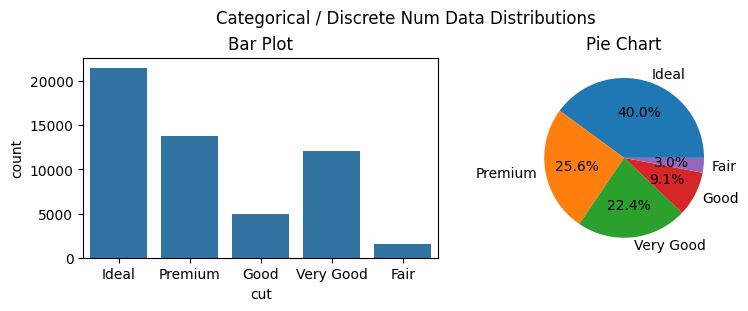

In [ ]:
catg_disc_analysis(data,'cut')

Value Counts for  color
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
Null values = 0


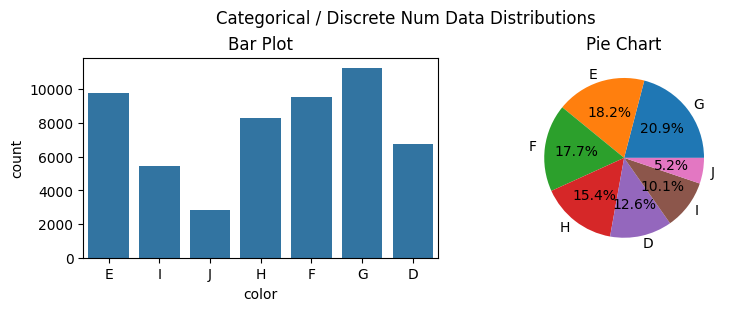

In [ ]:
catg_disc_analysis(data,'color')

Value Counts for  clarity
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64
Null values = 0


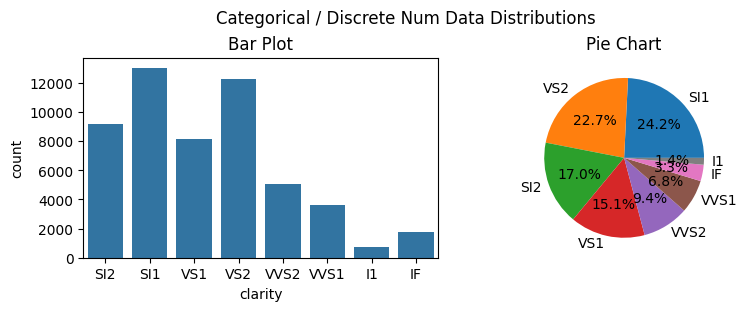

In [ ]:
catg_disc_analysis(data,'clarity')

In [ ]:
## Observations
# "Ideal" is the most popular cut, "G" is the most common color, and "SI1" is the most frequent clarity.

## Bivariate Analysis

In [ ]:
## Cont-Cont
def cont_cont_bivar_analysis(data,col1,col2):
  print(f"Covariance = {data[col1].cov(data[col2])}")
  print(f"Correlation = {data[col1].corr(data[col2])}")
  sns.scatterplot(x=col1,y=col2,data=data)
  plt.show()

Covariance = 1742.7653642651187
Correlation = 0.9215913011934771


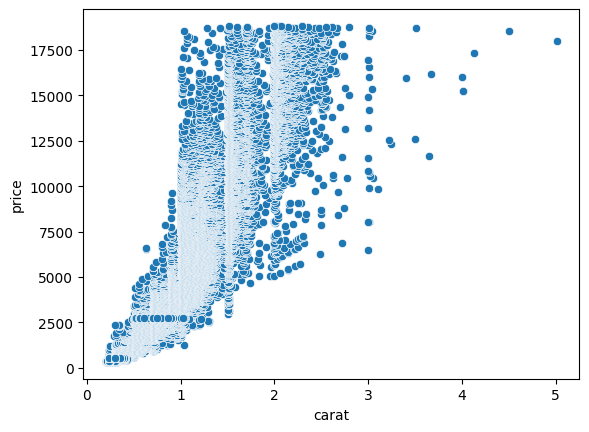

In [ ]:
cont_cont_bivar_analysis(data,'carat','price')

In [ ]:
# Observations
## Price and Carat have strong positive nearly linear relationship with some outliers

Covariance = -60.8537121364241
Correlation = -0.010647404584142966


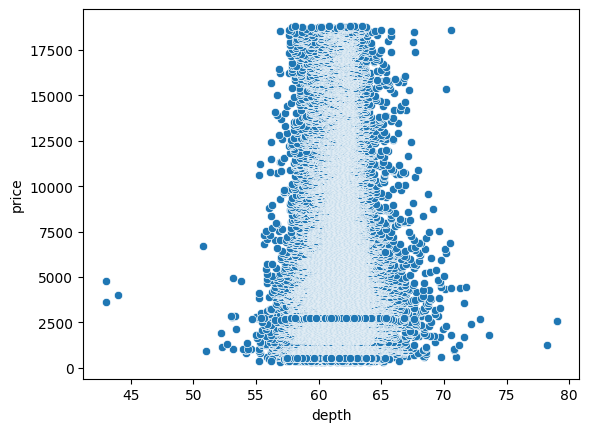

In [ ]:
cont_cont_bivar_analysis(data,'depth','price')

In [ ]:
# Observations
## 1. Negative covariance indicates an inverse relationship between depth and price but the value is small, which suggests that the relationship is weak
## 2. The correlation is very close to zero,suggesting that changes in depth do not significantly impact the price of the diamond
## 3. Scatter plot likely shows a cloud of points without any clear trend, which supports the weak correlation value

Covariance = 1133.318064067903
Correlation = 0.12713390212174194


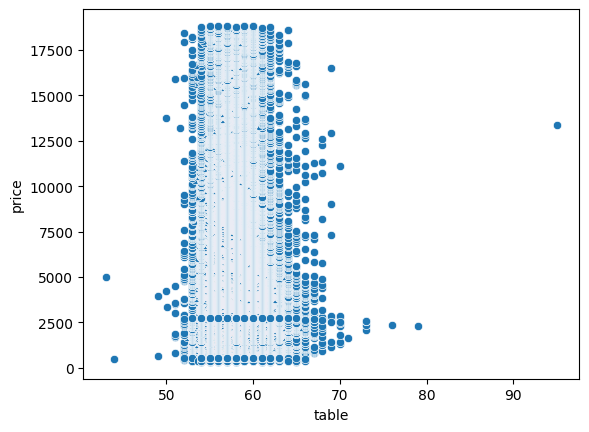

In [ ]:
cont_cont_bivar_analysis(data,'table','price')

In [ ]:
# Observations
## 1. Positive covariance indicates a direct relationship — as table increases, price tends to increase
## 2. Correlation value is close to zero, meaning that changes in the table size have minimal influence on the price.
## 3. Scatter plot likely shows scattered points without a clear trend, confirming the weak correlation

Covariance = 0.5184841302385671
Correlation = 0.9750942267264208


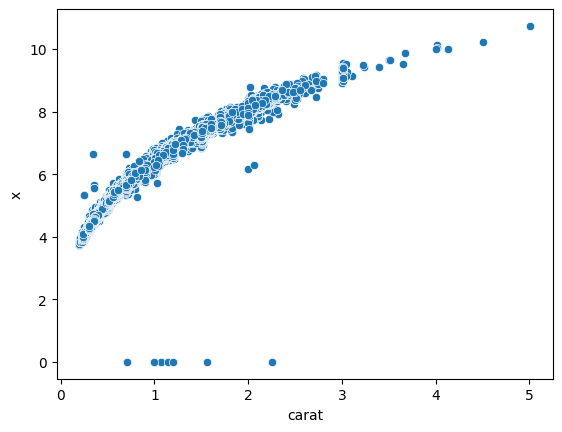

In [ ]:
cont_cont_bivar_analysis(data,'carat','x')

Covariance = 0.5152478164102593
Correlation = 0.951722199012981


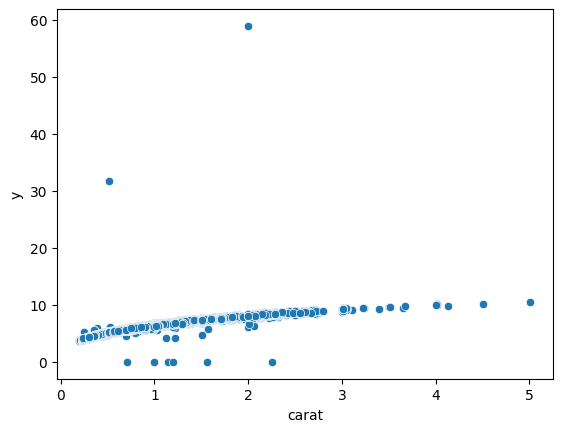

In [ ]:
cont_cont_bivar_analysis(data,'carat','y')

Covariance = 0.31891683911046526
Correlation = 0.9533873805614187


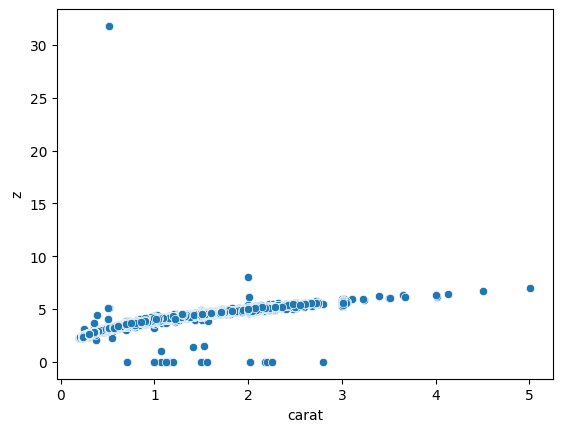

In [ ]:
cont_cont_bivar_analysis(data,'carat','z')

In [ ]:
# Observations
## Carat weight is an excellent predictor of the diamond’s overall size, with length (x) showing the strongest relationship, followed closely by width (y) and depth (z)

In [ ]:
# cont - cat bivariate
def cont_cat_bivar_analysis(data,cat_col,num_col):
  sns.boxplot(x=cat_col,y=num_col,data=data)

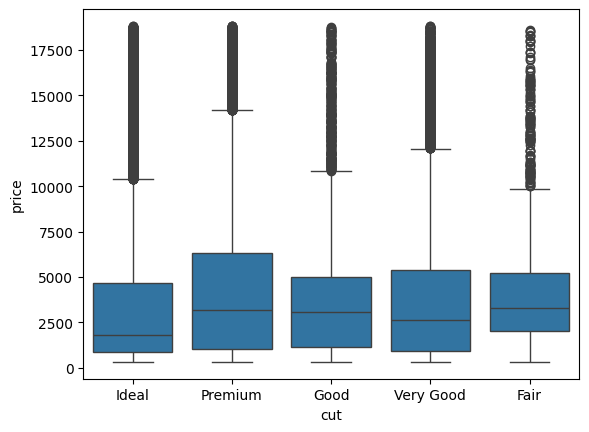

In [ ]:
cont_cat_bivar_analysis(data,'cut','price')

In [ ]:
# Observations
## Due to very large outliers the observation based on cut data has very high chance of being wrong

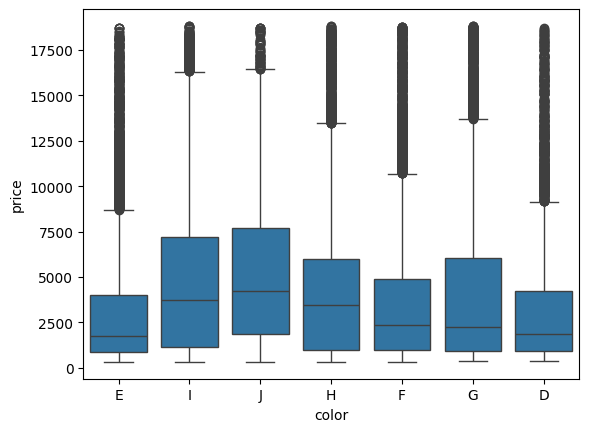

In [ ]:
cont_cat_bivar_analysis(data,'color','price')

In [ ]:
# Observations
## Due to very large outliers the observation based on color data has very high chance of being wrong

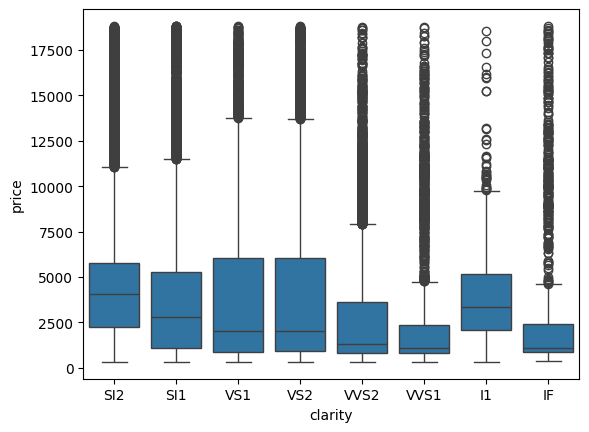

In [ ]:
cont_cat_bivar_analysis(data,'clarity','price')

In [ ]:
# Observations
## Due to very large outliers the observation based on clarity data has very high chance of being wrong

In [ ]:
## cat - cat bivariate
def cat_cat_bivar_analysis(data,col1,col2):
  ct_data=pd.crosstab(data[col1],data[col2])
  ct_data.plot(kind='bar')

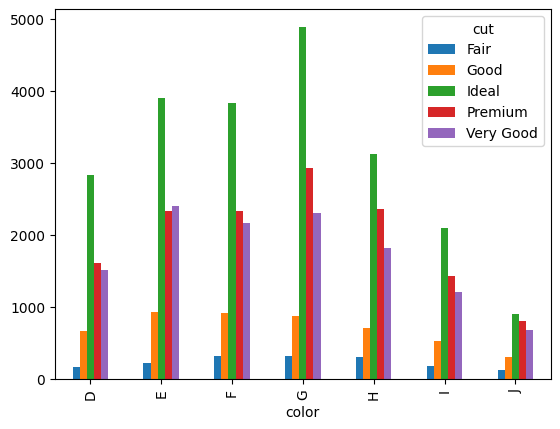

In [ ]:
cat_cat_bivar_analysis(data,'color','cut')

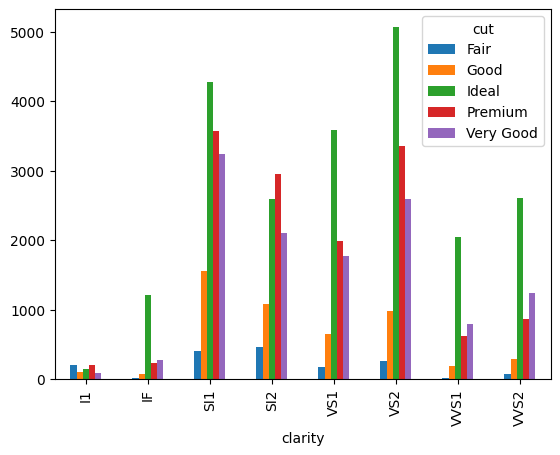

In [ ]:
cat_cat_bivar_analysis(data,'clarity','cut')

## Data Preprocessing

count     53940.00
min          -1.61
max           1.61
mean         -0.39
median       -0.36
var           0.34
std           0.58
skew          0.10
kurt         -1.06
Name: log_carat, dtype: float64



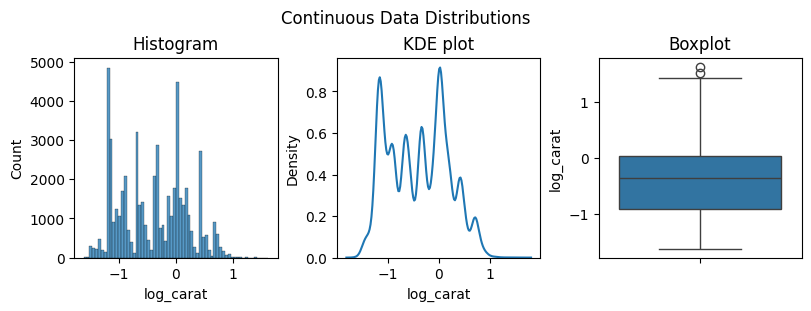

In [ ]:
## Log transformations
## If a data is skewed, log transformation can make this data normally distributed
## log-norm dist -> if we apply log on this type of data, then the data dist will become nearly normal
# log -transform reduces effect of outliers without dropping them
import numpy as np
data['log_carat']=np.log(data['carat'])
cont_non_vis_analysis(data,'log_carat')
cont_vis_analysis(data,'log_carat')

# Log transform on carat has reduced effect of outliers, which might be helpful for this task

count     53940.00
min           5.79
max           9.84
mean          7.79
median        7.78
var           1.03
std           1.01
skew          0.12
kurt         -1.10
Name: log_price, dtype: float64



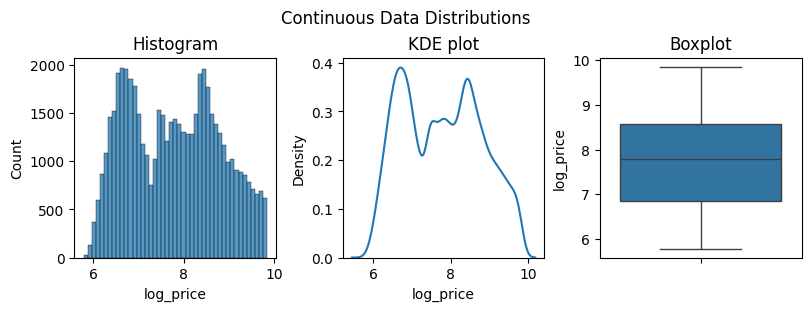

In [ ]:
data['log_price']=np.log(data['price'])
cont_non_vis_analysis(data,'log_price')
cont_vis_analysis(data,'log_price')

# Log transform on price has reduced effect of outliers, which might be helpful for this task
## When the data is normally distributed, them ML algorithms learn better. The accuracy and performance of the model is also improved

In [ ]:
## After log transformation of carat and price data
## The log_carat and log_price dist looks nearly normal
## In log_carat and log_price, we see reduce in outliers when we plot boxplot

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log_carat,log_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


In [ ]:
## duplicates check
data[data.duplicated()]


,carat,cut,color,clarity,depth,table,price,x,y,z,log_carat,log_price
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66,-0.235722,7.971776
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66,-0.235722,7.971776
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66,-0.235722,7.971776
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66,-0.235722,7.971776
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28,0.418710,8.040769
...,...,...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20,-0.653926,7.559559
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17,-0.673345,7.646354
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00,-0.342490,7.663877
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17,-0.673345,7.697575


In [ ]:
data.duplicated().sum()

np.int64(146)

In [ ]:
## remove duplicate rows from data
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

## Label Encoding



In [ ]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z,log_carat,log_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.328504,7.921898
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.328504,7.921898
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.356675,7.921898
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,-0.150823,7.921898


In [ ]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
data.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
data.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
## As number of categories in cut,color and clarity are more
## So we chose to do label encoding for cut, color and clarity column

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Apply label encoding
data['cut_encoded'] = le.fit_transform(data['cut'])
data['color_encoded'] = le.fit_transform(data['color'])
data['clarity_encoded'] = le.fit_transform(data['clarity'])
data

,carat,cut,color,clarity,depth,table,price,x,y,z,log_carat,log_price,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.328504,7.921898,2,0,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.328504,7.921898,1,0,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.356675,7.921898,4,0,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,-0.150823,7.921898,3,4,3


In [ ]:
data_encoded = data.copy()

In [ ]:
data_encoded

,carat,cut,color,clarity,depth,table,price,x,y,z,log_carat,log_price,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.328504,7.921898,2,0,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.328504,7.921898,1,0,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.356675,7.921898,4,0,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,-0.150823,7.921898,3,4,3


In [ ]:
## drop log transformerd columns
data_encoded.drop(['carat','price'],axis=1,inplace=True)

In [ ]:
data_encoded.drop(['cut','color','clarity'],axis=1,inplace=True)

In [ ]:
data_encoded

,depth,table,x,y,z,log_carat,log_price,cut_encoded,color_encoded,clarity_encoded
0,61.5,55.0,3.95,3.98,2.43,-1.469676,5.786897,2,1,3
1,59.8,61.0,3.89,3.84,2.31,-1.560648,5.786897,3,1,2
2,56.9,65.0,4.05,4.07,2.31,-1.469676,5.789960,1,1,4
3,62.4,58.0,4.20,4.23,2.63,-1.237874,5.811141,3,5,5
4,63.3,58.0,4.34,4.35,2.75,-1.171183,5.814131,1,6,3
...,...,...,...,...,...,...,...,...,...,...
53935,60.8,57.0,5.75,5.76,3.50,-0.328504,7.921898,2,0,2
53936,63.1,55.0,5.69,5.75,3.61,-0.328504,7.921898,1,0,2
53937,62.8,60.0,5.66,5.68,3.56,-0.356675,7.921898,4,0,2
53938,61.0,58.0,6.15,6.12,3.74,-0.150823,7.921898,3,4,3


## Model with Feature Scaling
### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
## scaling is more important for numerical columns compared to categorical columns

numerical_columns=['depth','table','x','y','z','log_carat','log_price']
scaled_features = scaler.fit_transform(data_encoded[numerical_columns])

In [ ]:
scaled_features

array([[-0.17349495, -1.10048556, -1.58939891, ..., -1.57257443,
        -1.83893253, -1.97178832],
       [-1.36239274,  1.58569074, -1.64293763, ..., -1.74277972,
        -1.99458518, -1.97178832],
       [-3.39051249,  3.37647494, -1.50016772, ..., -1.74277972,
        -1.83893253, -1.9687691 ],
       ...,
       [ 0.73566218,  1.13799469, -0.0635455 , ...,  0.03019213,
         0.06541146,  0.1328439 ],
       [-0.52317077,  0.24260259,  0.37368735, ...,  0.28550008,
         0.41762418,  0.1328439 ],
       [ 0.31605119, -1.10048556,  0.08814753, ...,  0.14366233,
         0.18345821,  0.1328439 ]])

In [ ]:
scaler.mean_
## Column wise means used for standard scaling

array([61.74807971, 57.45810871,  5.73121445,  5.73465331,  3.53871361,
       -0.39490492,  7.78713764])

In [ ]:
scaler.scale_
## Column wise sigma values used for standard scaling

array([1.42989584, 2.23365831, 1.12068432, 1.14119858, 0.70503093,
       0.58445377, 1.01442951])

In [ ]:
scaled_features.shape

(53794, 7)

In [ ]:
type(scaled_features)

numpy.ndarray

In [ ]:
scaled_features

array([[-0.17349495, -1.10048556, -1.58939891, ..., -1.57257443,
        -1.83893253, -1.97178832],
       [-1.36239274,  1.58569074, -1.64293763, ..., -1.74277972,
        -1.99458518, -1.97178832],
       [-3.39051249,  3.37647494, -1.50016772, ..., -1.74277972,
        -1.83893253, -1.9687691 ],
       ...,
       [ 0.73566218,  1.13799469, -0.0635455 , ...,  0.03019213,
         0.06541146,  0.1328439 ],
       [-0.52317077,  0.24260259,  0.37368735, ...,  0.28550008,
         0.41762418,  0.1328439 ],
       [ 0.31605119, -1.10048556,  0.08814753, ...,  0.14366233,
         0.18345821,  0.1328439 ]])

In [ ]:
data_encoded.shape

(53794, 10)

In [ ]:
## create dataframe for scaled data
data_scaled=pd.DataFrame(scaled_features,columns=numerical_columns)
data_scaled

,depth,table,x,y,z,log_carat,log_price
0,-0.173495,-1.100486,-1.589399,-1.537553,-1.572574,-1.838933,-1.971788
1,-1.362393,1.585691,-1.642938,-1.660231,-1.742780,-1.994585,-1.971788
2,-3.390512,3.376475,-1.500168,-1.458689,-1.742780,-1.838933,-1.968769
3,0.455922,0.242603,-1.366321,-1.318485,-1.288899,-1.442320,-1.947890
4,1.085338,0.242603,-1.241397,-1.213332,-1.118694,-1.328211,-1.944943
...,...,...,...,...,...,...,...
53789,-0.663041,-0.205093,0.016763,0.022211,-0.054911,0.113612,0.132844
53790,0.945468,-1.100486,-0.036776,0.013448,0.101111,0.113612,0.132844
53791,0.735662,1.137995,-0.063546,-0.047891,0.030192,0.065411,0.132844
53792,-0.523171,0.242603,0.373687,0.337668,0.285500,0.417624,0.132844


In [ ]:
cat_columns=['cut_encoded', 'color_encoded','clarity_encoded']
# most of the encoded categorical values are in same scale, so we decied not to perform any scaling for these features
# Yet it would be better if we do it

In [ ]:
data_encoded.reset_index(drop=True,inplace=True)
data_scaled.reset_index(drop=True,inplace=True)
## Before merging scaled numerical data and categorical data, do reset_index because ->
## The merging happens based on row index

In [ ]:
data_scaled=pd.concat([data_scaled,data_encoded[cat_columns]],axis=1)
data_scaled
# get scaled numerical features from data_scaled and categorical encoded features from data_encoded
# Merge these two in single df which is data_scaler

,depth,table,x,y,z,log_carat,log_price,cut_encoded,color_encoded,clarity_encoded
0,-0.173495,-1.100486,-1.589399,-1.537553,-1.572574,-1.838933,-1.971788,2,1,3
1,-1.362393,1.585691,-1.642938,-1.660231,-1.742780,-1.994585,-1.971788,3,1,2
2,-3.390512,3.376475,-1.500168,-1.458689,-1.742780,-1.838933,-1.968769,1,1,4
3,0.455922,0.242603,-1.366321,-1.318485,-1.288899,-1.442320,-1.947890,3,5,5
4,1.085338,0.242603,-1.241397,-1.213332,-1.118694,-1.328211,-1.944943,1,6,3
...,...,...,...,...,...,...,...,...,...,...
53789,-0.663041,-0.205093,0.016763,0.022211,-0.054911,0.113612,0.132844,2,0,2
53790,0.945468,-1.100486,-0.036776,0.013448,0.101111,0.113612,0.132844,1,0,2
53791,0.735662,1.137995,-0.063546,-0.047891,0.030192,0.065411,0.132844,4,0,2
53792,-0.523171,0.242603,0.373687,0.337668,0.285500,0.417624,0.132844,3,4,3


### Train_Test_Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df,test_df=train_test_split(data_scaled,test_size=0.2,shuffle=True,random_state=42)
## shuffle = True is good to have in train test split
## it removes any sorting order in data, which helps in getting a better random sample

In [ ]:
train_df.shape,test_df.shape

((43035, 10), (10759, 10))

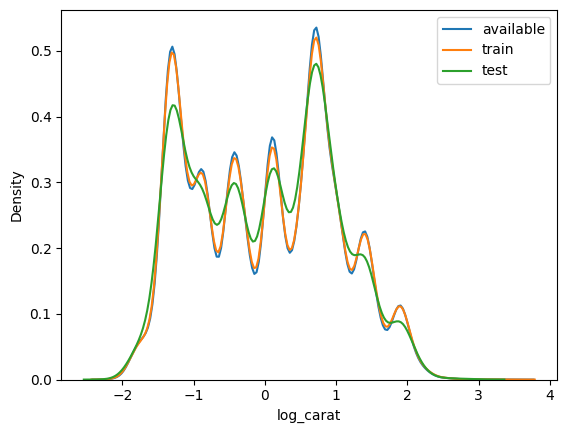

In [ ]:
sns.kdeplot(x='log_carat',data=data_scaled,label='available')
sns.kdeplot(x='log_carat',data=train_df,label='train')
sns.kdeplot(x='log_carat',data=test_df,label='test')
plt.legend()

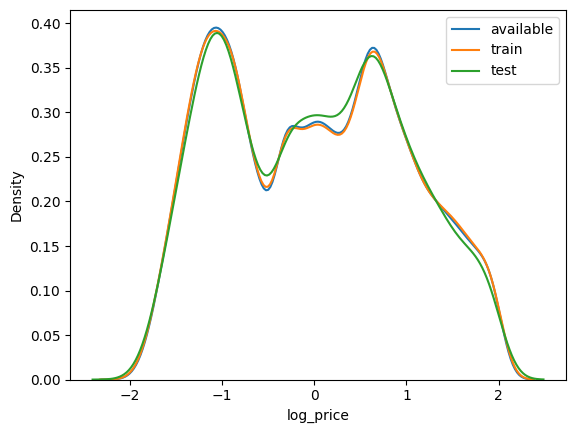

In [ ]:
sns.kdeplot(x='log_price',data=data_scaled,label='available')
sns.kdeplot(x='log_price',data=train_df,label='train')
sns.kdeplot(x='log_price',data=test_df,label='test')
plt.legend()

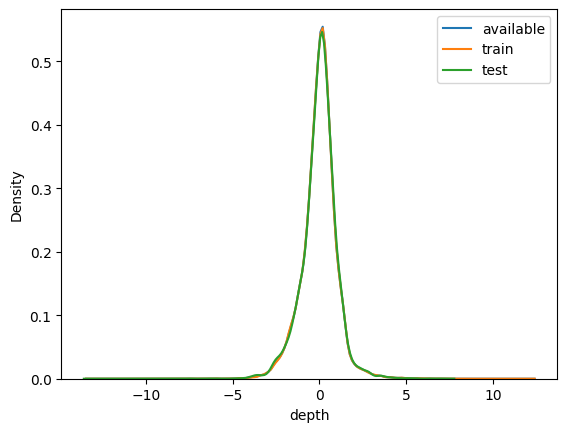

In [ ]:
sns.kdeplot(x='depth',data=data_scaled,label='available')
sns.kdeplot(x='depth',data=train_df,label='train')
sns.kdeplot(x='depth',data=test_df,label='test')
plt.legend()

Value Counts for  cut_encoded
cut_encoded
2    21488
3    13748
4    12069
1     4891
0     1598
Name: count, dtype: int64
Null values = 0


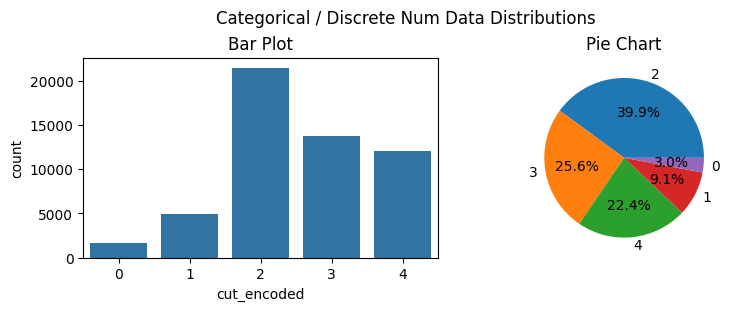

In [ ]:
catg_disc_analysis(data_scaled,'cut_encoded')

Value Counts for  color_encoded
color_encoded
3    11262
1     9776
2     9520
4     8272
0     6755
5     5407
6     2802
Name: count, dtype: int64
Null values = 0


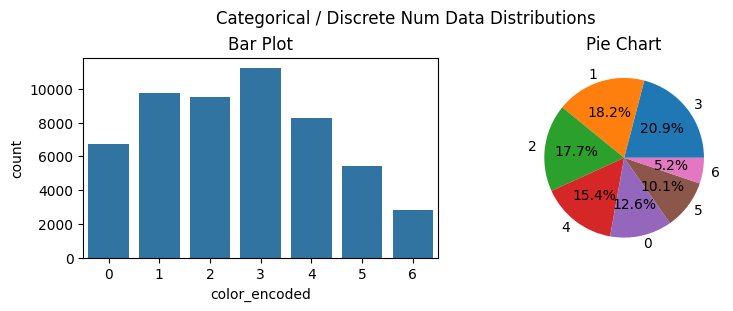

In [ ]:
catg_disc_analysis(data_scaled,'color_encoded')

Value Counts for  clarity_encoded
clarity_encoded
2    13032
5    12229
3     9150
4     8156
7     5056
6     3647
1     1784
0      740
Name: count, dtype: int64
Null values = 0


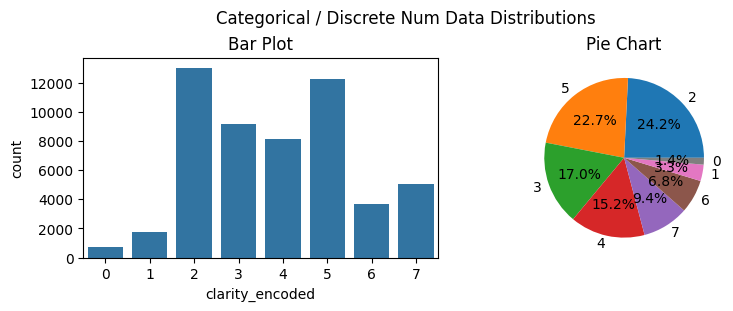

In [ ]:
catg_disc_analysis(data_scaled,'clarity_encoded')

## Import KNN algorithm class

In [ ]:
from sklearn.neighbors import KNeighborsRegressor ## Class for KNN regression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5) ## step1 : define the value of K

In [ ]:
data_scaled.columns

Index(['depth', 'table', 'x', 'y', 'z', 'log_carat', 'log_price',
       'cut_encoded', 'color_encoded', 'clarity_encoded'],
      dtype='object')

In [ ]:
train_df

,depth,table,x,y,z,log_carat,log_price,cut_encoded,color_encoded,clarity_encoded
33451,0.176181,-1.100486,-1.125397,-1.055604,-1.061959,-1.120563,-1.051741,2,0,5
26689,0.176181,-0.205093,2.345697,2.256703,2.327964,2.032492,1.900070,2,0,3
45777,-1.222522,-0.205093,-0.438317,-0.380874,-0.537159,-0.410594,-0.331691,2,1,5
3064,-0.033625,0.242603,0.204148,0.171177,0.186214,0.293884,0.313644,3,0,2
43692,-0.173495,-0.652790,-0.822011,-0.801485,-0.820834,-0.849842,-0.504683,2,1,6
...,...,...,...,...,...,...,...,...,...,...
11284,-0.942782,0.242603,0.694920,0.635601,0.540808,0.675682,0.716512,3,4,5
44732,-0.033625,-1.548182,-0.188469,-0.153044,-0.168381,-0.114860,-0.386454,2,3,2
38158,0.036311,-1.145255,-1.196782,-1.151993,-1.161245,-1.273889,-1.810372,2,6,2
860,0.735662,0.690299,0.355841,0.258804,0.398970,0.495410,0.172785,3,6,2


In [ ]:
x_train=train_df.drop('log_price', axis=1).to_numpy()
print(x_train.shape)

(43035, 9)


In [ ]:
## target variable
y_train=train_df['log_price'].to_numpy()
print(y_train.shape)

(43035,)


In [ ]:
x_test=test_df.drop('log_price', axis=1).to_numpy()
print(x_test.shape)

(10759, 9)


In [ ]:
y_test=test_df['log_price'].to_numpy()
print(y_test.shape)

(10759,)


In [ ]:
knn_model.fit(x_train,y_train)
## as training process, KNN algorithm stores all training data points
print("Training completed")

Training completed


In [ ]:
y_pred = knn_model.predict(x_train)
## In knn_model.predict
## Step2 : KNN will compute N distances where N is number of training data points
## Step3 : Distances are sorted in ascending order
## Step 4 : Top K=5 nearest neighbor datapoints are picked
## Step 5 : KNN will compute mean of charges for Top K neighbors and prediction will happen
mse = mean_squared_error(y_train, y_pred) ## calculate MSE
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score (Accuracy): {r2}")

Mean Squared Error: 0.012909934584380986
R² Score (Accuracy): 0.9871718408297243


In [ ]:
knn_model.score(x_train,y_train)

0.9871718408297243

In [ ]:
## Model Evaluation - testing error and accuracy

y_pred = knn_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.019986934892122533
R² Score: 0.9794901004996641


In [ ]:
knn_model.score(x_test,y_test)

0.9794901004996641

### With Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ## create object of class MinMaxScaler
## Scaling all features including numerical + categorical
scaled_features = scaler.fit_transform(data_encoded)

In [ ]:
data_encoded.columns

Index(['depth', 'table', 'x', 'y', 'z', 'log_carat', 'log_price',
       'cut_encoded', 'color_encoded', 'clarity_encoded'],
      dtype='object')

In [ ]:
scaled_features.shape

(53794, 10)

In [ ]:
## create dataframe for scaled data
data_scaled=pd.DataFrame(scaled_features,columns=data_encoded.columns)
data_scaled

,depth,table,x,y,z,log_carat,log_price,cut_encoded,color_encoded,clarity_encoded
0,0.513889,0.230769,0.367784,0.067572,0.076415,0.043393,0.000000,0.50,0.166667,0.428571
1,0.466667,0.346154,0.362197,0.065195,0.072642,0.015148,0.000000,0.75,0.166667,0.285714
2,0.386111,0.423077,0.377095,0.069100,0.072642,0.043393,0.000755,0.25,0.166667,0.571429
3,0.538889,0.288462,0.391061,0.071817,0.082704,0.115361,0.005977,0.75,0.833333,0.714286
4,0.563889,0.288462,0.404097,0.073854,0.086478,0.136067,0.006714,0.25,1.000000,0.428571
...,...,...,...,...,...,...,...,...,...,...
53789,0.494444,0.269231,0.535382,0.097793,0.110063,0.397698,0.526389,0.50,0.000000,0.285714
53790,0.558333,0.230769,0.529795,0.097623,0.113522,0.397698,0.526389,0.25,0.000000,0.285714
53791,0.550000,0.326923,0.527002,0.096435,0.111950,0.388951,0.526389,1.00,0.000000,0.285714
53792,0.500000,0.288462,0.572626,0.103905,0.117610,0.452863,0.526389,0.75,0.666667,0.428571


In [ ]:
train_df,test_df=train_test_split(data_scaled,test_size=0.2,shuffle=True,random_state=20)

In [ ]:
x_train=train_df.drop('log_price', axis=1).to_numpy()
print(x_train.shape)

(43035, 9)


In [ ]:
## target variable
y_train=train_df['log_price'].to_numpy()
print(y_train.shape)

(43035,)


In [ ]:
x_test=test_df.drop('log_price', axis=1).to_numpy()
print(x_test.shape)

(10759, 9)


In [ ]:
y_test=test_df['log_price'].to_numpy()
print(y_test.shape)

(10759,)


In [ ]:
knn_model.fit(x_train,y_train)
## as training process, KNN algorithm stores all training data points
print("Training completed")

Training completed


In [ ]:
y_pred = knn_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred) ## calculate MSE
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score (Accuracy): {r2}")

Mean Squared Error: 0.0006264046937104889
R² Score (Accuracy): 0.989983789465081


In [ ]:
## Model Evaluation - testing error and accuracy

y_pred = knn_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.0009523223563219697
R² Score: 0.9847906923502632


In [ ]:
# Observations
## Min Max Scaling results in a model that fits the data more accurately (lower error and higher R²), both on the training and testing datasets

## HyperParameter Tuning
- KNN model is a non-parametric model
- It doesn't have model parameters like Linear Regression
- But it has one hyperparameter that is K - number of nearest neighbors
- Finding optimal value of K

In [ ]:
def model_evaluation(knn_model,x,y):
  y_pred = knn_model.predict(x)
  mse = mean_squared_error(y, y_pred) ## calculate MSE
  r2 = r2_score(y, y_pred)
  return mse,r2

In [ ]:
for i in range(1,15):
  knn_model=KNeighborsRegressor(n_neighbors=i)
  knn_model.fit(x_train,y_train)
  mse,r2=model_evaluation(knn_model,x_train,y_train)
  print(f'K = {i}')
  print(f"Training : Mean Squared Error: {mse} | R² Score (Accuracy): {r2}")
  mse,r2=model_evaluation(knn_model,x_test,y_test)
  print(f"Testing : Mean Squared Error: {mse} | R² Score (Accuracy): {r2}")
  print('-'*40,'\n')

K = 1
Training : Mean Squared Error: 2.6570562518679785e-06 | R² Score (Accuracy): 0.9999575136727278
Testing : Mean Squared Error: 0.0014322944519606536 | R² Score (Accuracy): 0.9771251752935686
---------------------------------------- 

K = 2
Training : Mean Squared Error: 0.0003513767880709885 | R² Score (Accuracy): 0.994381485449039
Testing : Mean Squared Error: 0.0010656268273649726 | R² Score (Accuracy): 0.9829811343295534
---------------------------------------- 

K = 3
Training : Mean Squared Error: 0.000484743793094709 | R² Score (Accuracy): 0.9922489471488926
Testing : Mean Squared Error: 0.0009661468485558976 | R² Score (Accuracy): 0.984569904762855
---------------------------------------- 

K = 4
Training : Mean Squared Error: 0.000563767452824011 | R² Score (Accuracy): 0.9909853588951073
Testing : Mean Squared Error: 0.0009421339330399638 | R² Score (Accuracy): 0.9849534091689256
---------------------------------------- 

K = 5
Training : Mean Squared Error: 0.000626404693

In [ ]:
## Conclusion on Hyperparameter tuning
#  Optimal k appears to be 4, as it provides the lowest testing MSE (≈0.00094) and the highest testing R² (≈0.985).